In [1]:
import json
import pandas as pd
# Opening JSON file
f = open('/home/ferdinand_t/data/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)
print(df.head())

         id                                               name  \
0  16489913                 UN imposes sanctions on DRC rebels   
1  16489912            Catholic Church abuse hotline goes cold   
2  16489903  "Fiscal cliff" tax hikes go into effect in the US   
3  16490025  Kim seeks reconciliation with South, economic ...   
4  16490029  Senate-approved fiscal deal faces House consid...   

                    shortTitle  \
0      UN sanctions DRC rebels   
1                 Disconnected   
2  US goes over "fiscal cliff"   
3    A rare New Year's address   
4   US House mulls fiscal deal   

                                                text  \
0  <p>\n\tThe UN Security Council has sanctioned ...   
1  <p>\n\tFor two and a half years, the counselin...   
2  <p>\n\tAs the clock struck midnight in Washing...   
3  <p>\n\tKim Jong Un, who came to office just ov...   
4  <p>\n\tLess than two hours after the US had of...   

                                              teaser  \
0  A 

In [2]:
print(df.columns)

Index(['id', 'name', 'shortTitle', 'text', 'teaser', 'shortTeaser', 'kicker',
       'regions', 'keywords', 'keywordStrings', 'thematicFocusCategory',
       'navigations', 'categories', 'departments', 'firstPublicationDate',
       'lastModifiedDate', 'contentDate', 'relatedAutoTopics', 'contentLinks',
       'articles', 'isOpinion', 'geographicLocations', 'contentAssociations',
       'mainContentImageLink', 'images', 'externalLinks', 'topStory',
       'language'],
      dtype='object')


In [3]:
df['firstPublicationDate'].isnull().sum()

133589

In [4]:
df.shape

(175659, 28)

In [5]:
sum(df['firstPublicationDate'].apply(lambda x: x is None))

133589

In [6]:
df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

In [7]:
df['thematicFocusCategory'][-1]

{'name': 'Politics'}

In [8]:
df['cleanFocusCategory'][-1]

'Politics'

In [9]:
df['regions'][-1][0]['name']

'Ecuador'

In [10]:
df['cleanRegions'] = df['regions'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)

In [11]:
df['cleanRegions'].head()

0    None
1    None
2    None
3    None
4    None
Name: cleanRegions, dtype: object

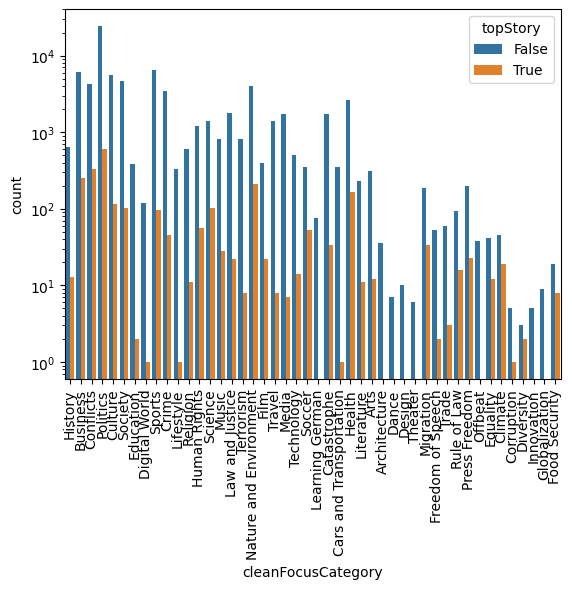

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='cleanFocusCategory', hue='topStory', data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

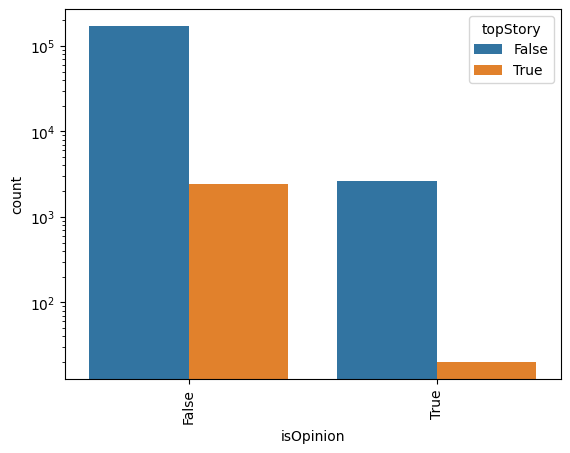

In [13]:
sns.countplot(x='isOpinion', hue='topStory', data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

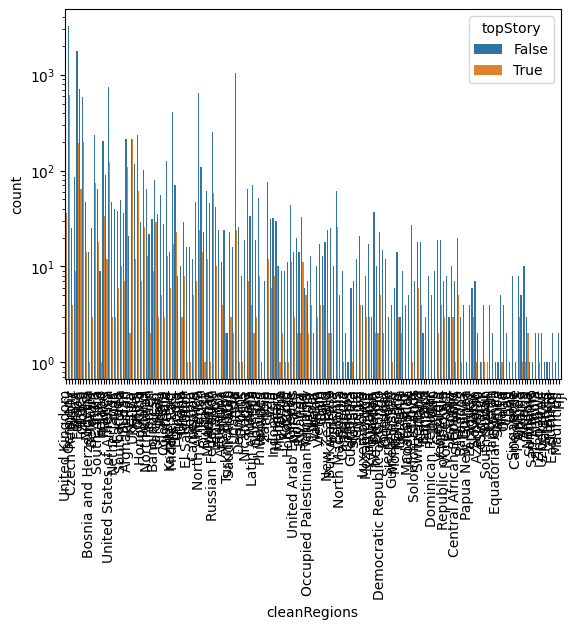

In [14]:
sns.countplot(x='cleanRegions', hue='topStory', data=df)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [15]:
print(df[df['id'] == 61640745])

Empty DataFrame
Columns: [id, name, shortTitle, text, teaser, shortTeaser, kicker, regions, keywords, keywordStrings, thematicFocusCategory, navigations, categories, departments, firstPublicationDate, lastModifiedDate, contentDate, relatedAutoTopics, contentLinks, articles, isOpinion, geographicLocations, contentAssociations, mainContentImageLink, images, externalLinks, topStory, language, cleanFocusCategory, cleanRegions]
Index: []

[0 rows x 30 columns]


In [16]:
df['firstContentAssociations'] = df['contentAssociations'].apply(lambda x: x[0]['id'] if len(x) != 0 else None)
df['secondContentAssociations'] = df['contentAssociations'].apply(lambda x: x[1]['id'] if len(x) > 1 else None)
df['thirdContentAssociations'] = df['contentAssociations'].apply(lambda x: x[2]['id'] if len(x) > 2 else None)
df['fourthContentAssociations'] = df['contentAssociations'].apply(lambda x: x[3]['id'] if len(x) > 3 else None)

In [17]:
print(df['firstContentAssociations'].isin(df['id']).sum())
print(df['secondContentAssociations'].isin(df['id']).sum())
print(df['thirdContentAssociations'].isin(df['id']).sum())
print(df['fourthContentAssociations'].isin(df['id']).sum())

246
252
239
228


In [18]:
print(df['id'].isin(df['firstContentAssociations']).sum())
print(df['id'].isin(df['secondContentAssociations']).sum())
print(df['id'].isin(df['thirdContentAssociations']).sum())
print(df['id'].isin(df['fourthContentAssociations']).sum())

246
252
239
228


In [19]:
print(df[df['id'].isin(df['firstContentAssociations'])].head())

             id                                               name  \
37992  38713827                        How to sit on burning tires   
38183  38760066  Reports: Obama warned Trump about Flynn's Russ...   
38557  38839913                Touring Lübeck in an amphibious bus   
39271  38982608  German Cup Final: Varela tattoo farce disrupts...   
39333  38999939            Cyber-insurance market bound to explode   

                                              shortTitle  \
37992                        How to sit on burning tires   
38183                     Obama warned Trump about Flynn   
38557                Touring Lübeck in an amphibious bus   
39271  German Cup Final: Varela tattoo farce disrupts...   
39333                  Cyber-insurance market to explode   

                                                    text  \
37992  <div class="vjs-wrapper embed big "><h2 aria-l...   
38183  <div class="vjs-wrapper embed big "><h2 aria-l...   
38557  <p><span class="placeholder" da

In [20]:
print(df.loc[df['id']==38713827,['id','teaser','contentAssociations']]) 
print(df.loc[df['id']==40340621,['id','teaser','contentAssociations']])

             id                                             teaser  \
37992  38713827  An activist in Niger is creating jobs for loca...   

                                     contentAssociations  
37992  [{'id': 40340621}, {'id': 40340622}, {'id': 40...  
              id                                             teaser  \
139595  40340621  Germany's Philipp Kohlschreiber breezed past J...   

                                      contentAssociations  
139595  [{'id': 41762019}, {'id': 41762020}, {'id': 41...  
